# Titanic

1. Conjunto de dados escolhidos: Dados do Titanic.
2. Perguntas:
    1. Existe relação entre o sexo da pessoa e a sobrevivência?
    2. Existe relação entre a classe e a sobrevivência?
    3. E a relação Classe x Sexo x Sobrevivência?
    4. Há relação entre Idade x Sobrevivência?
    5. Qual a relação entre Idade, Sobrevivência e Sexo?
    6. O lugar onde as pessoas embarcaram tem alguma influência?
    7. Qual a relação entre Tarifa e Sobrevivência?
3. Descrição de como foi respondido: Utilizando queries.
4. Limpeza: 
    1. Foi removida a coluna Cabin, pois não era útil para análise e tinha um grande número de items nulos.
    2. Foram removidas linhas com itens nulos.
5. Gráficos: Podem ser encontrados abaixo.
6. Consultas: https://matplotlib.org/gallery/statistics/barchart_demo.html

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


df = pd.read_csv("titanic-data-6.csv")

## Verificação dos dados

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Preparação e limpeza dos dados

### Removendo a coluna Cabin

In [128]:
df.drop(['Cabin'], axis=1, inplace=True)

### Limpando dados nulos

In [129]:
df.dropna(inplace=True)

### Renomeando as colunas

In [130]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

### Verificando dados após preparo

In [131]:
df.isnull().sum().any()

False

In [132]:
df.duplicated().any()

False

In [133]:
df.shape

(712, 11)

In [134]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Funções de apoio

### Plot

In [135]:
# Escolhendo o tamanho dos gráficos
plt.rcParams['figure.figsize'] = 10, 5

In [136]:
def plot_bar(bar_one, bar_two, label_one, label_two, xticks_labels, title, y_label):
    """
    Função que plota um gráfico de barra
    Argumentos:
        bar_one: Lista com items que aparecem nas barras da direita.
        bar_two: Lista com items que aparecem nas barras da direita.
        label_one: Legenda da barra da direita.
        label_two: Legenda da barra da esquerda.
        xticks_labels: Lista com nomes das colunas.
        title: Título do gráfico.
        y_label: Rótulo do eixo y.
    """
    ind = np.arange(len(bar_one))
    width = 0.35 
    fig, ax = plt.subplots()
    ax.bar(ind, bar_one, width, color='r', label=label_one)
    ax.bar(ind + width, bar_two, width, color='b', label=label_two)
    ax.set_ylabel(y_label)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xticks_labels)
    ax.set_title(title)
    fig.tight_layout()
    ax.legend()

In [137]:
def plot_line(line, xticks, title, y_label):
    """
    Função que plota um gráfico de linha
    Argumentos:
        line: Lista com items que aparecem na linha.
        xticks: Lista com nomes das colunas.
        title: Título do gráfico.
        y_label: Rótulo do eixo y.
    """
    fig, ax = plt.subplots()
    ax.plot(xticks, line)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    fig.tight_layout()

## Análise

### Existe relação entre o sexo da pessoa e a sobrevivência?

In [138]:
males = df.query('sex == "male"')['sex'].count()
males_survived = df.query('sex == "male" and survived == 1')['sex'].count()

print("Total de homens: {} Homens sobreviventes: {}".format(males, males_survived))

Total de homens: 453 Homens sobreviventes: 93


In [139]:
females = df.query('sex == "female"')['sex'].count()
females_survived = df.query('sex == "female" and survived == 1')['sex'].count()

print("Total de mulheres: {} Mulheres sobreviventes: {}".format(females, females_survived))

Total de mulheres: 259 Mulheres sobreviventes: 195


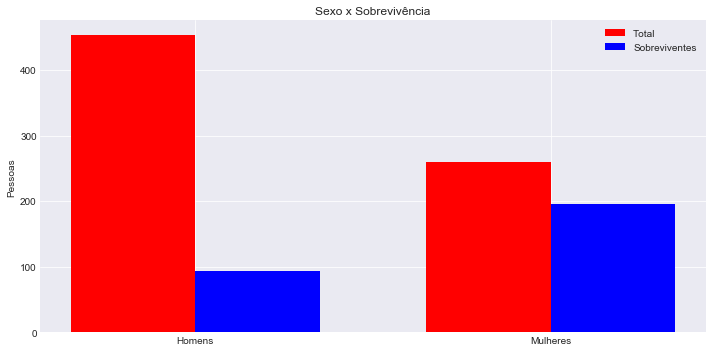

In [140]:
bar_one = [males, females]
bar_two = [males_survived, females_survived]
xticks_labels = ('Homens', 'Mulheres')
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Sexo x Sobrevivência', 'Pessoas')

**R- Sim, como podemos ver no gráfico acima as mulheres tiveram uma maior taxa de sobrevivência do que os homens.**

### Existe relação entre a classe e a sobrevivência?

In [141]:
df_first_class = df.query('pclass == 1')
first_class = df_first_class["pclass"].count()
df_first_class_survived = df_first_class.query('survived == 1')
first_class_survived = df_first_class_survived["pclass"].count()

print("Total de pessoas na primeira classe: {}\nTotal de sobreviventes na primeira classe: {}".format(first_class, first_class_survived))

Total de pessoas na primeira classe: 184
Total de sobreviventes na primeira classe: 120


In [142]:
df_second_class = df.query('pclass == 2')
second_class = df_second_class['pclass'].count()
df_second_class_survived = df_second_class.query('survived == 1')
second_class_survived = df_second_class_survived['pclass'].count()

print("Total de pessoas na segunda classe: {}\nTotal de sobreviventes na segunda classe: {}".format(second_class, second_class_survived))

Total de pessoas na segunda classe: 173
Total de sobreviventes na segunda classe: 83


In [143]:
df_third_class = df.query('pclass == 3')
third_class = df_third_class['pclass'].count()
df_third_class_survived = df_third_class.query('survived == 1')
third_class_survived = df_third_class_survived['pclass'].count()

print("Total de pessoas na terceira classe: {}\nTotal de sobreviventes na terceira classe: {}".format(third_class, third_class_survived))

Total de pessoas na terceira classe: 355
Total de sobreviventes na terceira classe: 85


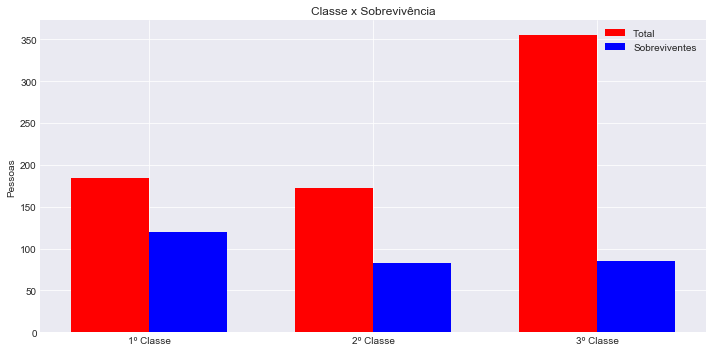

In [144]:
bar_one = [first_class, second_class, third_class]
bar_two = [first_class_survived, second_class_survived, third_class_survived]
xticks_labels = ['1º Classe', '2º Classe', '3º Classe']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Classe x Sobrevivência', 'Pessoas')

**R- Sim, a taxa de sobrevivência acompanha as classes, crescendo da terceira para primeira classe. A taxa de sobrevivência da terceira classe é menor d que 30%, pois das 355 pessoas que embarcaram apenas 85 sobreviveram.**

### E a relação Classe x Sexo x Sobrevivência?

In [145]:
df_first_class_male = df_first_class.query('sex == "male"')
first_class_male = df_first_class_male['sex'].count()
df_first_class_survived_male = df_first_class_survived.query('sex == "male"')
first_class_survived_male = df_first_class_survived_male['sex'].count()

print("Homens na primeira classe: {}\nHomens sobreviventes na primeira classe: {}".format(first_class_male, first_class_survived_male))

Homens na primeira classe: 101
Homens sobreviventes na primeira classe: 40


In [146]:
df_first_class_female = df_first_class.query('sex == "female"')
first_class_female = df_first_class_female['sex'].count()
df_first_class_survived_female = df_first_class_survived.query('sex == "female"')
first_class_survived_female = df_first_class_survived_female['sex'].count()

print("Mulheres na primeira classe: {}\nMulheres sobreviventes na primeira classe: {}".format(first_class_female, first_class_survived_female))

Mulheres na primeira classe: 83
Mulheres sobreviventes na primeira classe: 80


In [147]:
df_second_class_male = df_second_class.query('sex == "male"')
second_class_male = df_second_class_male['sex'].count()
df_second_class_survived_male = df_second_class_survived.query('sex == "male"')
second_class_survived_male = df_second_class_survived_male['sex'].count()

print("Homens na segunda classe: {}\nHomens sobreviventes na segunda classe: {}".format(second_class_male, second_class_survived_male))

Homens na segunda classe: 99
Homens sobreviventes na segunda classe: 15


In [148]:
df_second_class_female = df_second_class.query('sex == "female"')
second_class_female = df_second_class_female['sex'].count()
df_second_class_survived_female = df_second_class_survived.query('sex == "female"')
second_class_survived_female = df_second_class_survived_female['sex'].count()

print("Mulheres na segunda classe: {}\nMulheres sobreviventes na segunda classe: {}".format(second_class_female, second_class_survived_female))

Mulheres na segunda classe: 74
Mulheres sobreviventes na segunda classe: 68


In [149]:
df_third_class_male = df_third_class.query('sex == "male"')
third_class_male = df_third_class_male['sex'].count()
df_third_class_survived_male = df_third_class_survived.query('sex == "male"')
third_class_survived_male = df_third_class_survived_male['sex'].count()

print("Homens na terceira classe: {}\nHomens sobreviventes na segunda classe: {}".format(third_class_male, third_class_survived_male))

Homens na terceira classe: 253
Homens sobreviventes na segunda classe: 38


In [150]:
df_third_class_female = df_third_class.query('sex == "female"')
third_class_female = df_third_class_female['sex'].count()
df_third_class_survived_female = df_third_class_survived.query('sex == "female"')
third_class_survived_female = df_third_class_survived_female['sex'].count()

print("Mulheres na terceira classe: {}\nMulheres sobreviventes terceira na classe: {}".format(third_class_female, third_class_survived_female))

Mulheres na terceira classe: 102
Mulheres sobreviventes terceira na classe: 47


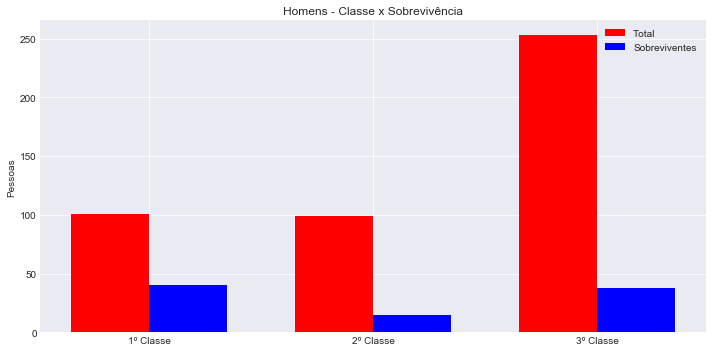

In [151]:
bar_one = [first_class_male, second_class_male, third_class_male]
bar_two = [first_class_survived_male, second_class_survived_male, third_class_survived_male]
xticks_labels = ['1º Classe', '2º Classe', '3º Classe']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Homens - Classe x Sobrevivência', 'Pessoas')

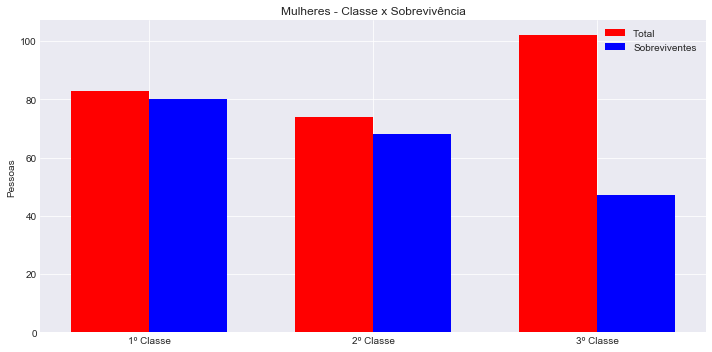

In [152]:
bar_one = [first_class_female, second_class_female, third_class_female]
bar_two = [first_class_survived_female, second_class_survived_female, third_class_survived_female]
xticks_labels = ['1º Classe', '2º Classe', '3º Classe']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Mulheres - Classe x Sobrevivência', 'Pessoas')

**R- Como podemos perceber pelo primeiro gráfico desta seção a taxa de sobrevivência dos homens é baixa mesmo na primeira classe, mas ainda assim obedece a regra de que quanto maior a classe maior a taxa de sobrevivência. Jás as mulheres das primeira e segunda classe se aproximaram de 100% de sobrevivência.**

### Há relação entre Idade x Sobrevivência?

In [153]:
df_below_ten = df.query('age <= 10')
below_ten = df_below_ten['age'].count()
df_btw_ten_twenty = df.query('age > 10 and age <= 20')
btw_ten_twenty = df_btw_ten_twenty['age'].count()
df_btw_twenty_fifty = df.query('age > 20 and age <= 50')
btw_twenty_fifty = df_btw_twenty_fifty['age'].count()
df_above_fifty = df.query('age >= 50')
above_fifty = df_above_fifty['age'].count()

df_below_ten_survived = df_below_ten.query('survived == 1')
below_ten_survived = df_below_ten_survived['age'].count()
df_btw_ten_twenty_survived = df_btw_ten_twenty.query('survived == 1')
btw_ten_twenty_survived = df_btw_ten_twenty_survived['age'].count()
df_btw_twenty_fifty_survived = df_btw_twenty_fifty.query('survived == 1')
btw_twenty_fifty_survived = df_btw_twenty_fifty_survived['age'].count()
df_above_fifty_survived = df_above_fifty.query('survived == 1')
above_fifty_survived = df_above_fifty_survived['age'].count()

print("Pessoas abaixo de 10 anos: {}\nPessoas abaixo de 10 anos que sobreviveram: {}".format(below_ten, below_ten_survived))
print("Pessoas entre 10 e 20 anos: {}\nPessoas entre 10 e 20 anos que sobreviveram: {}".format(btw_ten_twenty, btw_ten_twenty_survived))
print("Pessoas entre 20 e 50 anos: {}\nPessoas entre 20 e 50 anos que sobreviveram: {}".format(btw_twenty_fifty, btw_twenty_fifty_survived))
print("Pessoas acima de 50 anos: {}\nPessoas acima de 50 anos que sobreviveram: {}".format(above_fifty, above_fifty_survived))

Pessoas abaixo de 10 anos: 64
Pessoas abaixo de 10 anos que sobreviveram: 38
Pessoas entre 10 e 20 anos: 115
Pessoas entre 10 e 20 anos que sobreviveram: 44
Pessoas entre 20 e 50 anos: 470
Pessoas entre 20 e 50 anos que sobreviveram: 185
Pessoas acima de 50 anos: 73
Pessoas acima de 50 anos que sobreviveram: 26


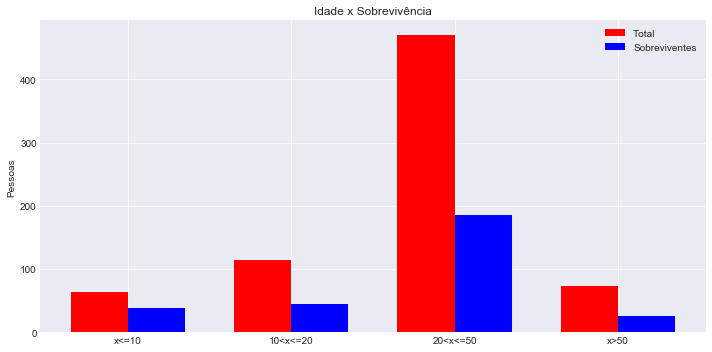

In [154]:
bar_one = [below_ten, btw_ten_twenty, btw_twenty_fifty, above_fifty]
bar_two = [below_ten_survived, btw_ten_twenty_survived, btw_twenty_fifty_survived, above_fifty_survived]
xticks_labels = ['x<=10', '10<x<=20', '20<x<=50', 'x>50']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Idade x Sobrevivência', 'Pessoas')

In [155]:
below_ten_died = df_below_ten.query('survived == 0')['age'].count()
btw_ten_twenty_died = df_btw_ten_twenty.query('survived == 0')['age'].count()
btw_twenty_fifty_died = df_btw_twenty_fifty.query('survived == 0')['age'].count()
above_fifty_died = df_above_fifty.query('survived == 0')['age'].count()

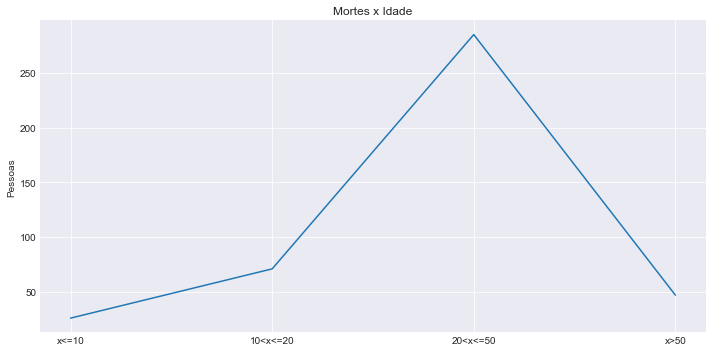

In [156]:
line = [below_ten_died, btw_ten_twenty_died, btw_twenty_fifty_died, above_fifty_died]
xticks = ['x<=10', '10<x<=20', '20<x<=50', 'x>50']
plot_line(line, xticks, 'Mortes x Idade', 'Pessoas')

**R- Foram separados grupos de pessoas com idades abaixo de 10 anos, pessoas entre 10 e 20 anos, pessoas entre 20 e 50 anos e pesoas acima de 50 anos. As crianças abaixo de 10 anos tinham a maior chance de sobrevivência, como vemos no gráfico Idade x Sobrevivência, e podemos notar que o número de mortes aumenta drasticamente no grupo de pessoas entre 20 e 50 anos de acordo com o gráfico Mortes x Idades**

### Qual a relação entre Idade, Sobrevivência e Sexo?

In [157]:
below_ten_male = df_below_ten.query('sex == "male"')['age'].count()
btw_ten_twenty_male = df_btw_ten_twenty.query('sex == "male"')['age'].count()
btw_twenty_fifty_male = df_btw_twenty_fifty.query('sex == "male"')['age'].count()
above_fifty_male = df_above_fifty.query('sex == "male"')['age'].count()
below_ten_female = df_below_ten.query('sex == "female"')['age'].count()
btw_ten_twenty_female = df_btw_ten_twenty.query('sex == "female"')['age'].count()
btw_twenty_fifty_female = df_btw_twenty_fifty.query('sex == "female"')['age'].count()
above_fifty_female = df_above_fifty.query('sex == "female"')['age'].count()

below_ten_male_survived = df_below_ten_survived.query('sex == "male"')['age'].count()
btw_ten_twenty_male_survived = df_btw_ten_twenty_survived.query('sex == "male"')['age'].count()
btw_twenty_fifty_male_survived = df_btw_twenty_fifty_survived.query('sex == "male"')['age'].count()
above_fifty_male_survived = df_above_fifty_survived.query('sex == "male"')['age'].count()
below_ten_female_survived = df_below_ten_survived.query('sex == "female"')['age'].count()
btw_ten_twenty_female_survived = df_btw_ten_twenty_survived.query('sex == "female"')['age'].count()
btw_twenty_fifty_female_survived = df_btw_twenty_fifty_survived.query('sex == "female"')['age'].count()
above_fifty_female_survived = df_above_fifty_survived.query('sex == "female"')['age'].count()

In [158]:
print("Homens abaixo dos 10 anos: {}\nHomens abaixo dos 10 anos que sobreviveram: {}".format(below_ten_male, below_ten_male_survived))
print("Homens entre 10 e 20 anos: {}\nHomens entre 10 e 20 anos que sobreviveram: {}".format(btw_ten_twenty_male, btw_ten_twenty_male_survived))
print("Homens entre 20 e 50 anos: {}\nHomens entre 20 e 50 anos que sobreviveram: {}".format(btw_twenty_fifty_male, btw_twenty_fifty_male_survived))
print("Homens acima dos 50 anos: {}\nHomens acima dos 50 anos que sobreviveram: {}".format(above_fifty_male, above_fifty_male_survived))

Homens abaixo dos 10 anos: 33
Homens abaixo dos 10 anos que sobreviveram: 19
Homens entre 10 e 20 anos: 69
Homens entre 10 e 20 anos que sobreviveram: 10
Homens entre 20 e 50 anos: 304
Homens entre 20 e 50 anos que sobreviveram: 58
Homens acima dos 50 anos: 52
Homens acima dos 50 anos que sobreviveram: 7


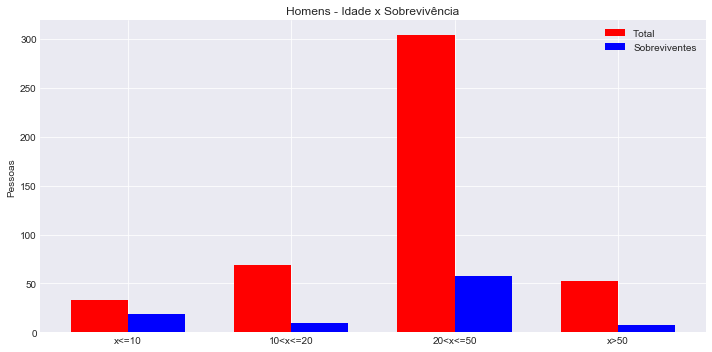

In [159]:
bar_one = [below_ten_male, btw_ten_twenty_male, btw_twenty_fifty_male, above_fifty_male]
bar_two = [below_ten_male_survived, btw_ten_twenty_male_survived, btw_twenty_fifty_male_survived, above_fifty_male_survived]
xticks_labels = ['x<=10', '10<x<=20', '20<x<=50', 'x>50']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Homens - Idade x Sobrevivência', 'Pessoas')

In [160]:
print("Mulheres abaixo dos 10 anos: {}\nMulheres abaixo dos 10 anos que sobreviveram: {}".format(below_ten_female, below_ten_female_survived))
print("Mulheres entre 10 e 20 anos: {}\nMulheres entre 10 e 20 anos que sobreviveram: {}".format(btw_ten_twenty_female, btw_ten_twenty_female_survived))
print("Mulheres entre 20 e 50 anos: {}\nMulheres entre 20 e 50 anos que sobreviveram: {}".format(btw_twenty_fifty_female, btw_twenty_fifty_female_survived))
print("Mulheres acima dos 50 anos: {}\nMulheres acima dos 50 anos que sobreviveram: {}".format(above_fifty_female, above_fifty_female_survived))

Mulheres abaixo dos 10 anos: 31
Mulheres abaixo dos 10 anos que sobreviveram: 19
Mulheres entre 10 e 20 anos: 46
Mulheres entre 10 e 20 anos que sobreviveram: 34
Mulheres entre 20 e 50 anos: 166
Mulheres entre 20 e 50 anos que sobreviveram: 127
Mulheres acima dos 50 anos: 21
Mulheres acima dos 50 anos que sobreviveram: 19


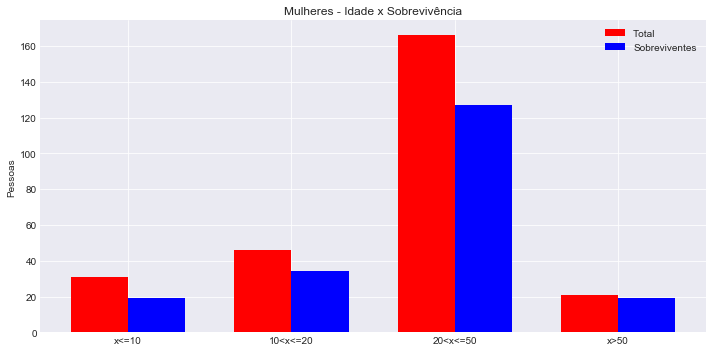

In [161]:
bar_one = [below_ten_female, btw_ten_twenty_female, btw_twenty_fifty_female, above_fifty_female]
bar_two = [below_ten_female_survived, btw_ten_twenty_female_survived, btw_twenty_fifty_female_survived, above_fifty_female_survived]
xticks_labels = ['x<=10', '10<x<=20', '20<x<=50', 'x>50']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Mulheres - Idade x Sobrevivência', 'Pessoas')

**R- Os grupos de meninos e meninas abaixo de 10 anos tiveram uma taxa de sobrevivência semelhantes, como percebemos nos dois gráficos dessa seção. Mulheres acima de 50 anos tiveram a maior taxa de sobrevivência**

### O lugar onde as pessoas embarcaram tem alguma influência?

In [162]:
embarked_c_male = df.query('embarked == "C" and sex == "male"')['embarked'].count()
embarked_q_male = df.query('embarked == "Q" and sex == "male"')['embarked'].count()
embarked_s_male = df.query('embarked == "S" and sex == "male"')['embarked'].count()
embarked_c_female = df.query('embarked == "C" and sex == "female"')['embarked'].count()
embarked_q_female = df.query('embarked == "Q" and sex == "female"')['embarked'].count()
embarked_s_female = df.query('embarked == "S" and sex == "female"')['embarked'].count()
embarked_c_male_survived = df.query('survived == 1 and embarked == "C" and sex == "male"')['embarked'].count()
embarked_q_male_survived = df.query('survived == 1 and embarked == "Q" and sex == "male"')['embarked'].count()
embarked_s_male_survived = df.query('survived == 1 and embarked == "S" and sex == "male"')['embarked'].count()
embarked_c_female_survived = df.query('survived == 1 and embarked == "C" and sex == "female"')['embarked'].count()
embarked_q_female_survived = df.query('survived == 1 and embarked == "Q" and sex == "female"')['embarked'].count()
embarked_s_female_survived = df.query('survived == 1 and embarked == "S" and sex == "female"')['embarked'].count()

print("Homens embarcados em Cherbourg: {}\nHomens embarcados em Cherbourg que sobreviveram: {}".format(embarked_c_male, embarked_c_male_survived))
print("Mulheres embarcados em Cherbourg: {}\nMulheres embarcados em Cherbourg que sobreviveram: {}".format(embarked_c_female, embarked_c_female_survived))
print("Homens embarcados em Queenstown: {}\nHomens embarcados em Queenstown que sobreviveram: {}".format(embarked_q_male, embarked_q_male_survived))
print("Mulheres embarcados em Queenstown: {}\nMulheres embarcados em Queenstown que sobreviveram: {}".format(embarked_q_female, embarked_q_female_survived))
print("Homens embarcados em Southampton: {}\nHomens embarcados em Southampton que sobreviveram: {}".format(embarked_s_male, embarked_s_male_survived))
print("Mulheres embarcados em Southampton: {}\nMulheres embarcados em Southampton que sobreviveram: {}".format(embarked_s_female, embarked_s_female_survived))

Homens embarcados em Cherbourg: 69
Homens embarcados em Cherbourg que sobreviveram: 24
Mulheres embarcados em Cherbourg: 61
Mulheres embarcados em Cherbourg que sobreviveram: 55
Homens embarcados em Queenstown: 16
Homens embarcados em Queenstown que sobreviveram: 1
Mulheres embarcados em Queenstown: 12
Mulheres embarcados em Queenstown que sobreviveram: 7
Homens embarcados em Southampton: 368
Homens embarcados em Southampton que sobreviveram: 68
Mulheres embarcados em Southampton: 186
Mulheres embarcados em Southampton que sobreviveram: 133


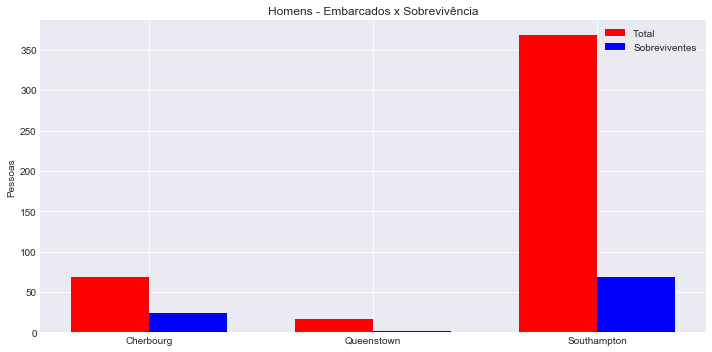

In [163]:
bar_one = [embarked_c_male, embarked_q_male, embarked_s_male]
bar_two = [embarked_c_male_survived, embarked_q_male_survived, embarked_s_male_survived]
xticks_labels = ['Cherbourg', 'Queenstown', 'Southampton']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Homens - Embarcados x Sobrevivência', 'Pessoas')

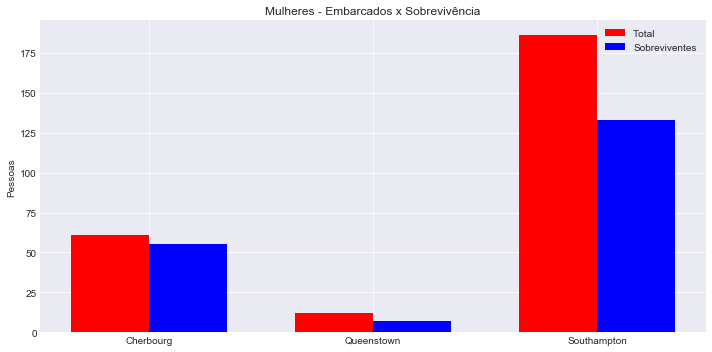

In [164]:
bar_one = [embarked_c_female, embarked_q_female, embarked_s_female]
bar_two = [embarked_c_female_survived, embarked_q_female_survived, embarked_s_female_survived]
xticks_labels = ['Cherbourg', 'Queenstown', 'Southampton']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Mulheres - Embarcados x Sobrevivência', 'Pessoas')

**R- A cidade de Southampton foi o local de embarque da maioria das pessoas. Apesar de não ser muito perceptivel nos gráficos a cidade de Cherbourg teve a maior taxa de sobrevivência.**

### Qual a relação entre Tarifa e Sobrevivência?

In [165]:
below_one = df.query('fare <= 1.0')['fare'].count()
btw_one_ten = df.query('fare > 1.0 and fare <= 10.0')['fare'].count()
btw_ten_twenty = df.query('fare > 10.0 and fare <= 20.0')['fare'].count()
btw_twenty_forty = df.query('fare > 20.0 and fare <= 40.0')['fare'].count()
btw_forty_eighty = df.query('fare > 40.0 and fare <= 80.0')['fare'].count()
above_eighty = df.query('fare > 80.0')['fare'].count()

below_one_survived = df.query('survived == 1 and fare <= 1.0')['fare'].count()
btw_one_ten_survived = df.query('survived == 1 and fare > 1.0 and fare <= 10.0')['fare'].count()
btw_ten_twenty_survived = df.query('survived == 1 and fare > 10.0 and fare <= 20.0')['fare'].count()
btw_twenty_forty_survived = df.query('survived == 1 and fare > 20.0 and fare <= 40.0')['fare'].count()
btw_forty_eighty_survived = df.query('survived == 1 and fare > 40.0 and fare <= 80.0')['fare'].count()
above_eighty_survived = df.query('survived == 1 and fare > 80.0')['fare'].count()

print("Pessoas que pagaram abaixo de 1.0: {}\nPessoas que pagaram abaixo de 1.0 e sobreviveram: {}".format(below_one, below_one_survived))
print("Pessoas que pagaram entre de 1.0 e 10.0: {}\nPessoas que pagaram entre de 1.0 e 10.0 e sobreviveram: {}".format(btw_one_ten, btw_one_ten_survived))
print("Pessoas que pagaram entre de 10.0 e 20.0: {}\nPessoas que pagaram entre de 10.0 e 20.0 e sobreviveram: {}".format(btw_ten_twenty, btw_ten_twenty_survived))
print("Pessoas que pagaram entre de 20.0 e 40.0: {}\nPessoas que pagaram entre de 20.0 e 40.0 e sobreviveram: {}".format(btw_twenty_forty, btw_twenty_forty_survived))
print("Pessoas que pagaram entre de 40.0 e 80.0: {}\nPessoas que pagaram entre de 40.0 e 80.0 e sobreviveram: {}".format(btw_forty_eighty, btw_forty_eighty_survived))
print("Pessoas que pagaram acima de 80.0: {}\nPessoas que pagaram acima de 80.0 e sobreviveram: {}".format(above_eighty, above_eighty_survived))

Pessoas que pagaram abaixo de 1.0: 7
Pessoas que pagaram abaixo de 1.0 e sobreviveram: 1
Pessoas que pagaram entre de 1.0 e 10.0: 229
Pessoas que pagaram entre de 1.0 e 10.0 e sobreviveram: 46
Pessoas que pagaram entre de 10.0 e 20.0: 155
Pessoas que pagaram entre de 10.0 e 20.0 e sobreviveram: 66
Pessoas que pagaram entre de 20.0 e 40.0: 171
Pessoas que pagaram entre de 20.0 e 40.0 e sobreviveram: 75
Pessoas que pagaram entre de 40.0 e 80.0: 83
Pessoas que pagaram entre de 40.0 e 80.0 e sobreviveram: 48
Pessoas que pagaram acima de 80.0: 67
Pessoas que pagaram acima de 80.0 e sobreviveram: 52


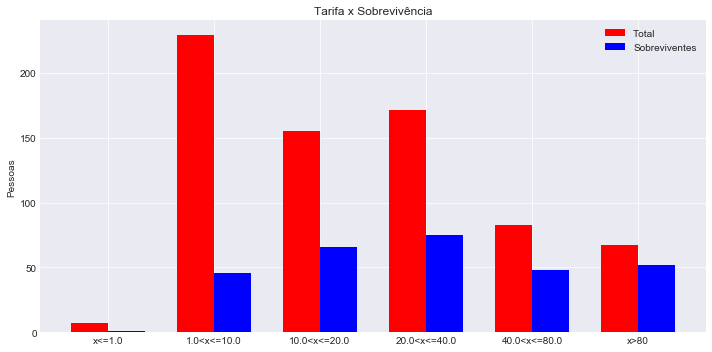

In [166]:
bar_one = [below_one, btw_one_ten, btw_ten_twenty, btw_twenty_forty, btw_forty_eighty, above_eighty]
bar_two = [below_one_survived, btw_one_ten_survived, btw_ten_twenty_survived, btw_twenty_forty_survived, btw_forty_eighty_survived, above_eighty_survived]
xticks_labels = ['x<=1.0', '1.0<x<=10.0', '10.0<x<=20.0', '20.0<x<=40.0', '40.0<x<=80.0', 'x>80']
plot_bar(bar_one, bar_two, 'Total', 'Sobreviventes', xticks_labels, 'Tarifa x Sobrevivência', 'Pessoas')

**R- Pessoas que pagaram abaixo de 10.0 tiveram a maior taxa de mortalidade e as pessoas que pagaram acima de 40.0 a menor, pessoas que pagaram entre 10.0 e 20.0 e 20.0 e 40.0 tiveram taxas de sobrevivência semelhantes, como notamos no gráfico Taxa x Sobrevivência.**

## Conclusões

**Mulheres de primeira classe formam o grupo que teve a maior taxa sobrevivência no Titanic. Além delas também tiveram taxas elevadas de sobrevivência crianças abaixo de 10 anos de ambos os sexos e e mulheres acima de 50 anos. Os homens da terceira classe formam o grupo que teve menor taxa de sobrevivência. Pessoas de ambos os sexos com idade ente 20 e 50 anos tiveram uma taxa de óbito elevada.**

### Limitações

**Apenas 79% das amostras do conjunto de dados titanic-data-6 foram analisadas, devido a remoção dos registros que apresentaram valores nulos nas colunas Age e Embarked. Essas colunas tinham informações valiosas e por isso não foram desprezadas, como foi feito com a coluna Cabin. Nelas foram encontradas informações como qual faxa etária e qual cidade de embarque tiveram a maior taxa de sobrevivência.**